In [ ]:
# Import the required libraries 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
X , y = load_iris(return_X_y=True) # We are using the iris dataset to test the RandomForestClassifier 

In [ ]:
X.shape,y.shape # Examine the shape (the size is small and apparently there are 4 features and 3 classes)

((150, 4), (150,))

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) # split the data into training and testing set

In [ ]:
from sklearn.ensemble import RandomForestClassifier # import the RandomForestClassifier class

In [ ]:
rf1 = RandomForestClassifier() # insantiate the model

In [ ]:
rf1.fit(X_train,y_train) # fit the training set of the data

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [ ]:
y_pred_rf1 = rf1.predict(X_test) # make predictions and store the predictions in a variable to further evaluate the model

In [ ]:
cross_val_score(rf1,X,y,cv=5,scoring = 'precision_weighted') # using weighted precion as we have multiple classes (>2)
# below is the weighted precision score for each class

array([0.96969697, 0.96969697, 0.94444444, 0.96969697, 1.        ])

In [ ]:
cross_val_score(rf1,X,y,cv=5,scoring = 'precision_weighted').mean(),cross_val_score(rf1,X,y,cv=5,scoring = 'precision_weighted').std()
# The mean and std are fantastic (ofcourse as we have trained 100 decision trees on a simple dataset with shape: 150 * 5)

(np.float64(0.9707070707070706), np.float64(0.017611712903194614))

In [ ]:
print(classification_report(y_test,y_pred_rf1)) 
# Also the classification report shows phenomenol results .

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: >

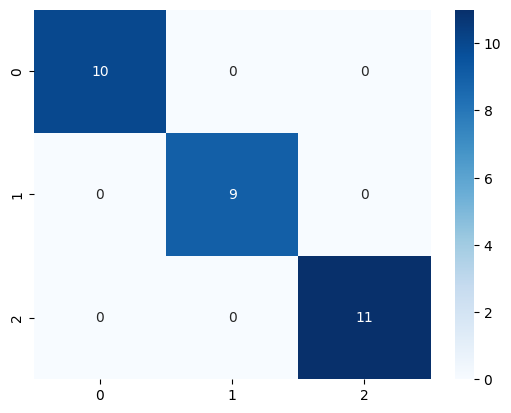

In [ ]:
sns.heatmap(
    data = confusion_matrix(y_test,y_pred_rf1) , 
    cmap = 'Blues',
    annot = True
)
# Here basically we have visualized the confusion matrix and it is too good to be real.

In [ ]:
# These are the parameters that will be passed to GridSearchCV for searching the best_params_ .
params = {
    'criterion' : ['gini', 'entropy', 'log_loss'], # The type of strategy used to split : gini , entropy or logloss.
    'n_estimators'  : [10,25,50,100], # The number of base models (DecisionTreeClassifier) used to predict the output in RandomForestClassifier.
    'max_depth' : [5,10,25,50], # The maximum depth to search for and stop more splitting.
    'min_samples_split' : [2,3],# The minimum samples (rows) to split on the data.
    'min_samples_leaf' : [1,2], # The minimum sample of leaf before stopping the splitting process.
    'bootstrap' : [True,False] # Whether or not the data passed to the models must be returned to the dataset for further shuffling or not.

}

In [ ]:
# Instantiate the grid and fit params
grid = GridSearchCV(
    RandomForestClassifier(), # The model to do the GridSearchCv
    param_grid = params ,  # The parameter grid
    cv = 5, # The number of folds to check each model for .
    scoring = 'precision_weighted', # The scoring strategy
    n_jobs=-1 # This used so that while training the process can use all the cores of my cpu to speed up the process.
) 

In [ ]:
grid.fit(X,y) # Fit the features and prediction 
# This process will take time if n_jobs is not set to -1 or there are many parameters to search from.

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'bootstrap': [True, False], 'criterion': ['gini', 'entropy', ...], 'max_depth': [5, 10, ...], 'min_samples_leaf': [1, 2], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'precision_weighted'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold

In [ ]:
rf1_best = grid.best_estimator_ # store the best estimator for future use .

In [ ]:
grid.best_index_ # get the index which gave the best output

np.int64(3)

In [ ]:
grid.best_params_ # can be used for the params of the random forest in future.

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
grid.best_score_ # The best score according to our strategy

np.float64(0.9707070707070706)

In [ ]:
from sklearn.tree import plot_tree # plot_tree to visualize one of the trees

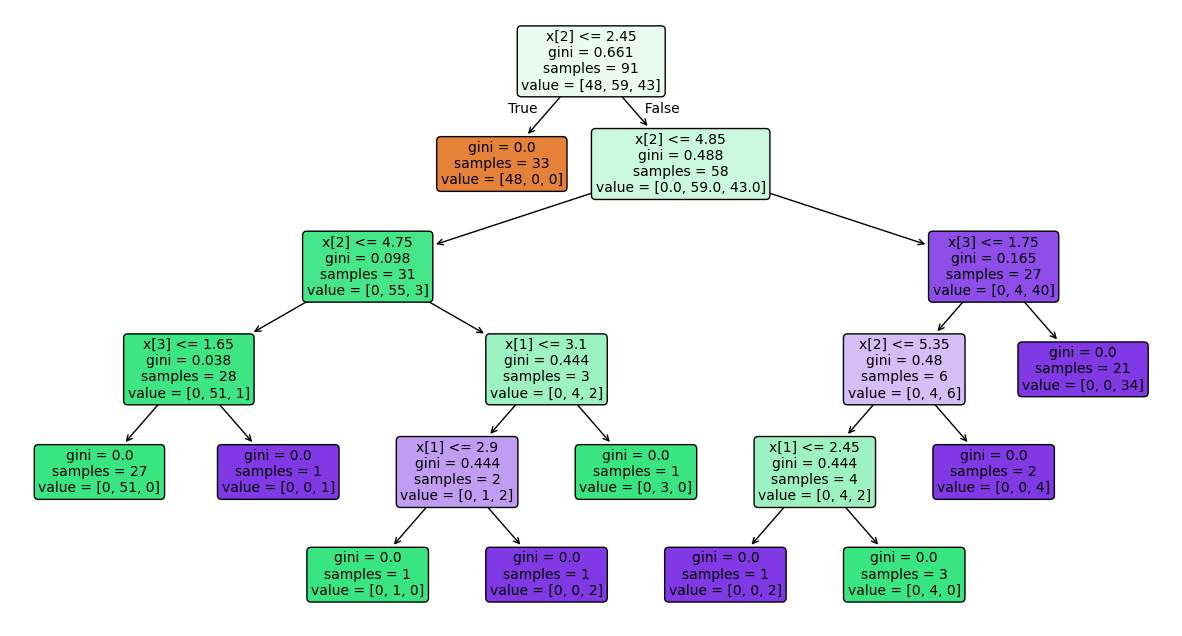

In [71]:
plt.figure(figsize=(15,8))
plot_tree(
    rf1_best.estimators_[3],
    filled = True,
    fontsize = 10,
    rounded = True
)
plt.show()
# plotting the best index estimator to visualize it 